<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="images.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Stroke Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

**What is Stroke ?**
<br>
It happens when the brain's blood vessels become narrowed or blocked, causing severely reduced blood flow (ischemia). Blocked or narrowed blood vessels are caused by fatty deposits that build up in blood vessels or by blood clots or other debris that travel through your bloodstream and lodge in the blood vessels in your brain.

A stroke occurs when the blood supply to the brain is interrupted. Most strokes result from a blood clot blocking a blood vessel in the brain or neck.



Our goal here is to predict whether person will get stroke or no based on some features that we have

## Data Definition

Each attribute is a medical risk factor.


**id**: unique identifier


**gender**: "Male", "Female" or "Other"


**age**: age of the patient


**hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension



**heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


**ever_married**: "No" or "Yes"


**work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"



**Residence_type**: "Rural" or "Urban"


**avg_glucose_level**: average glucose level in blood


**bmi**: body mass index


**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*



**stroke**: 1 if the patient had a stroke or 0 if not



**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]


# use below code to convert the all float values to 2 decimal format
pd.options.display.float_format = '{:.2f}'.format

# Set Options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows =  50 # None for no limit

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

 # Read Dataset 

In [4]:
import os
os.getcwd()

'/Users/aniket/Jupyter Notebook/Capstone Project/Solution'

In [5]:
dataset = pd.read_csv(r'../Dataset/healthcare-dataset-stroke-data.csv')
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

 Dimensions of the data

In [7]:
# 'shape' function gives the total number of rows and columns in the data
dataset.shape

(5110, 12)

# Exploratory Data Analysis and Preparation

##  Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

**1. Check for the data type**

In [8]:
# 'dtypes' gives the data type for each column
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Summary Statistics

**1. For numerical variables, use the describe()**

In [9]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


In [10]:
dataset.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Missing Values

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = dataset.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (dataset.isnull().sum()*100/dataset.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
bmi,201,3.93
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00


**There are null values present in 'bmi'.**

*We plot a heatmap for visualization of missing values.*

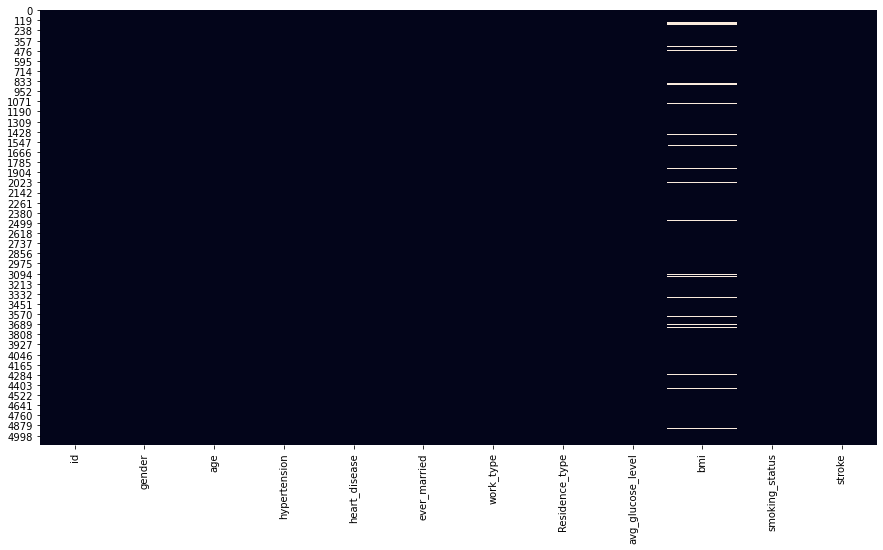

In [12]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(dataset.isnull(), cbar=False)

# display the plot
plt.show()

**The horizontal lines in the heatmap correspond to the missing values.**



**We have 201 null values on bmi column,I will replace these NAN values with the mean as we don't have much data. bmi don't change that much.**

In [13]:
bmi_mean = dataset['bmi'].mean()
dataset['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.893236911794673

In [14]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Re-checking the null values**

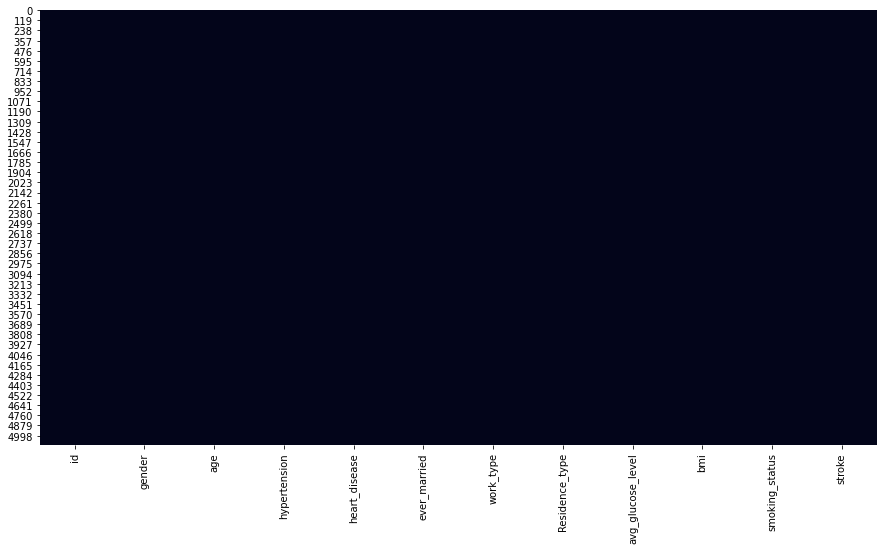

In [15]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(dataset.isnull(), cbar=False)

# display the plot
plt.show()

In [16]:
dataset.shape

(5110, 12)

In [17]:
#drop the field 'id'
# axis=1: it stands for column
# inplace=True: it perform operations on original data
dataset.drop('id', axis=1, inplace=True)

In [18]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.00,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


## Study correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

**1. Compute a correlation matrix**

In [19]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = dataset.corr()

# print the correlation matrix
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.28,1.00,0.11,0.17,0.16,0.13
heart_disease,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.17,0.13
bmi,0.33,0.16,0.04,0.17,1.00,0.04
stroke,0.25,0.13,0.13,0.13,0.04,1.00


## Data Visualization

### Heat Map

A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a heatmap.

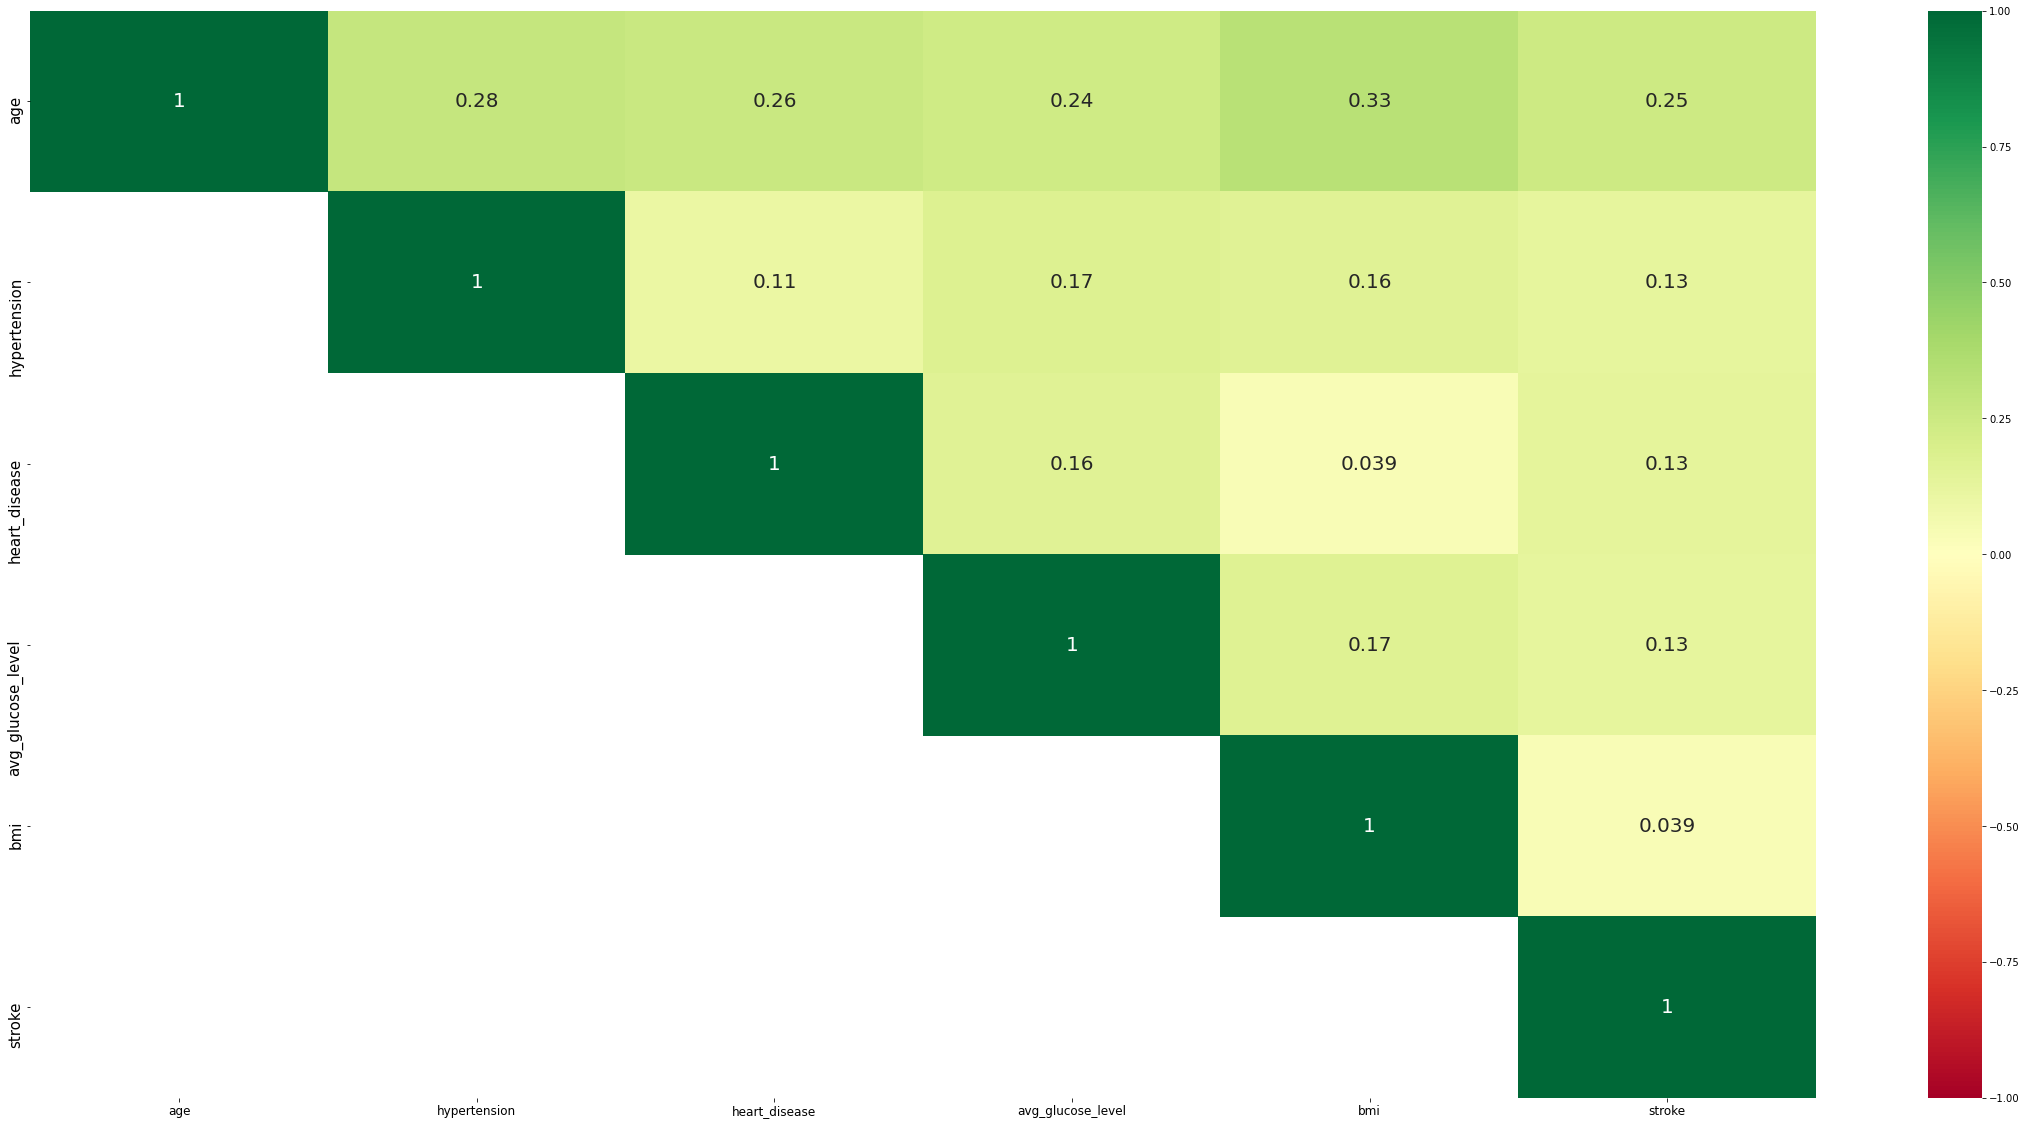

In [20]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (40,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

**Here we can see that no one is high correlated to each other so we wont be dropping any one.**

In [21]:
dataset.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1


### Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


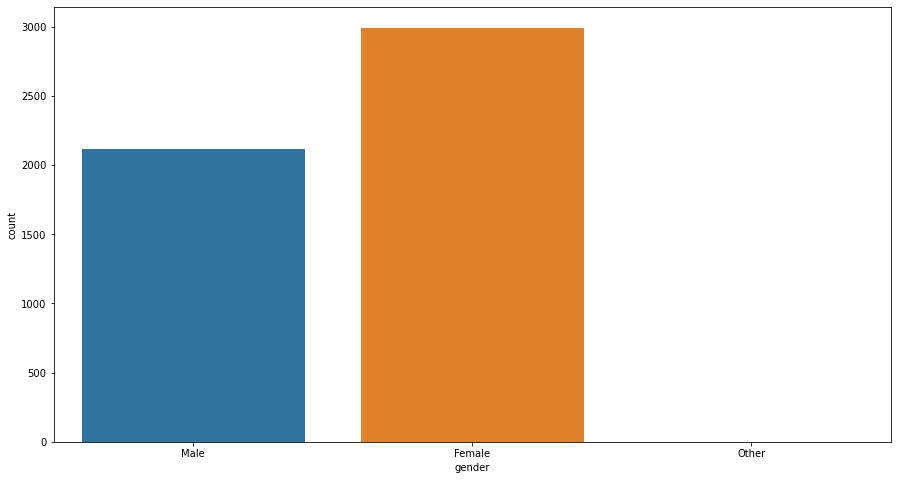

In [22]:
## visualizing Gender ratios
## checking the value_counts for gender 
## using sns countplot
print(dataset.gender.value_counts())
ax = sns.countplot(data=dataset, x="gender")
plt.show()

**Its seems that there is only 1 value of "Other" in gender column so we can drop it.**

In [23]:
##Dropping the value of other from gender.
dataset.drop(dataset.loc[dataset['gender']=='Other'].index, inplace=True)

In [24]:
dataset.shape

(5109, 11)

Female    2994
Male      2115
Name: gender, dtype: int64


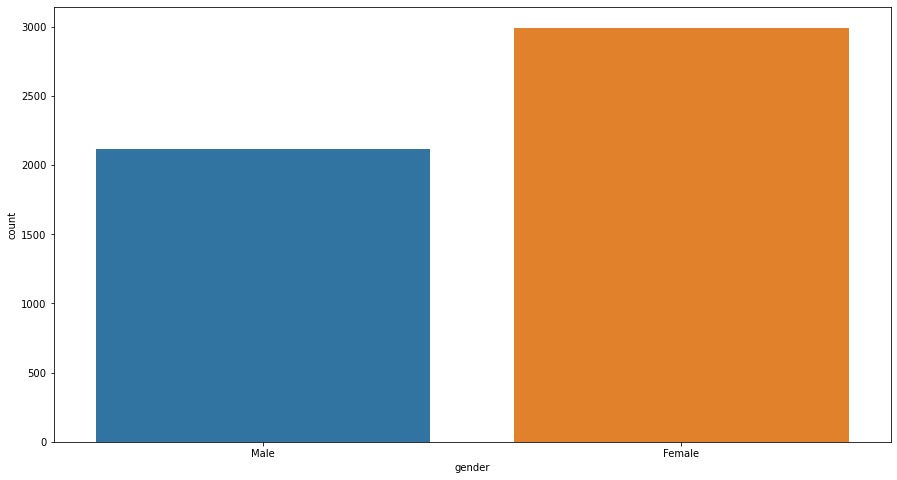

In [25]:
## rechekking that other as been drop from Gender or not.
## checking the value_counts for gender
## using sns countplot
print(dataset.gender.value_counts())
ax = sns.countplot(data=dataset, x="gender")
plt.show()

**It seems that the Females present in our dataset is higher than males.**

0    4611
1     498
Name: hypertension, dtype: int64


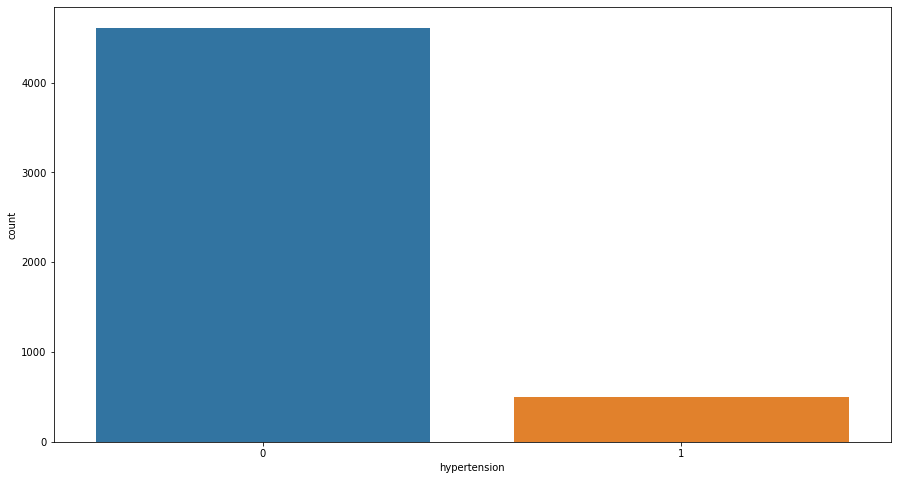

In [26]:
### visualizing Hypertension ratios
##also checking the value counts for hypertension
## using sns countplot
print(dataset.hypertension.value_counts())
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

**From above, it shows that less people are suffering from hypertension.**

0    4833
1     276
Name: heart_disease, dtype: int64


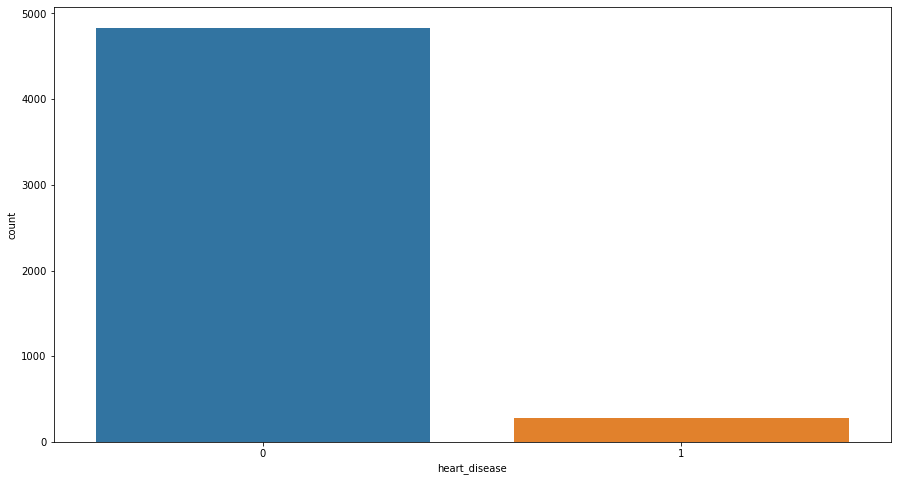

In [27]:
## visualizing heart_disease ratios
## checking the value_counts for heat disease
## using sns countplot

print(dataset.heart_disease.value_counts())
ax = sns.countplot(data=dataset, x="heart_disease")
plt.show()

**From above, it shows that less people are suffering from heart disease.**

Yes    3353
No     1756
Name: ever_married, dtype: int64


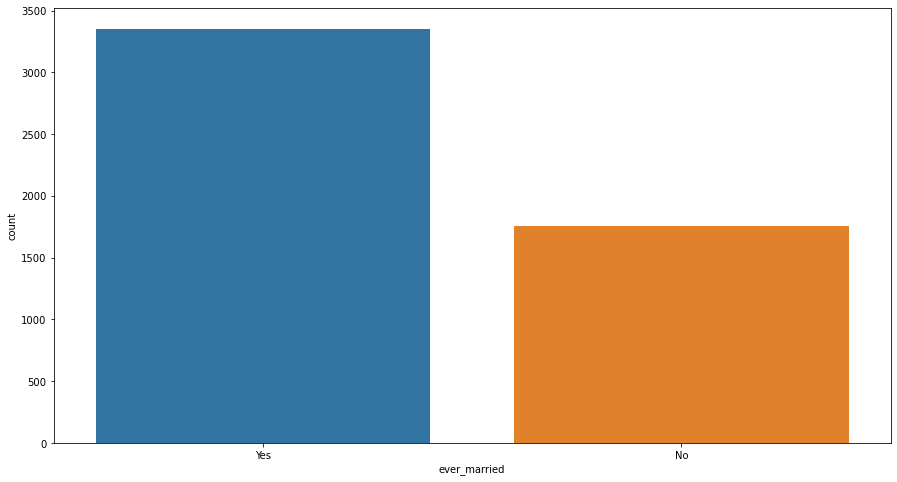

In [28]:
## visualizing the marriage status 
## checking the value_counts for marriage status
## using sns countplot

print(dataset.ever_married.value_counts())
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

**The ratio can seen from above is around 2:1 for being ever married.**

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


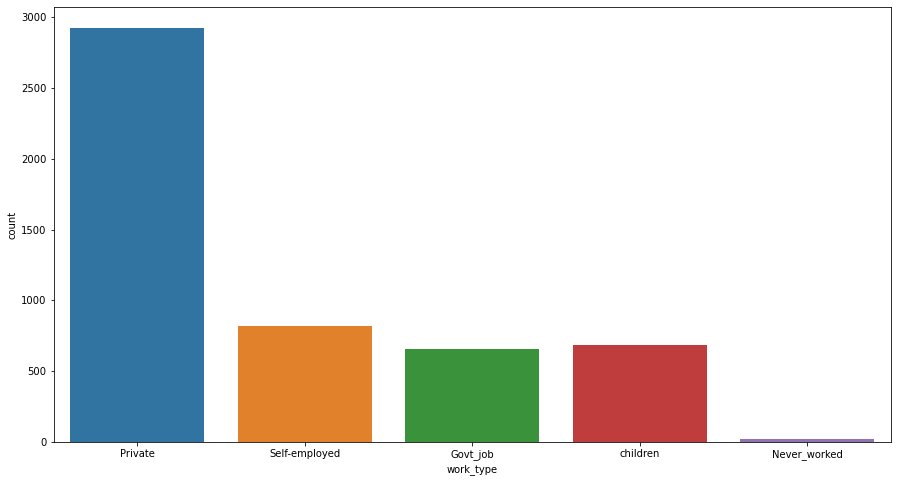

In [29]:
## visualizing Work Type status
## checking the value_counts for work type  status
## using sns countplot

print(dataset.work_type.value_counts())
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

**A lot of people works in Private sector.**

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


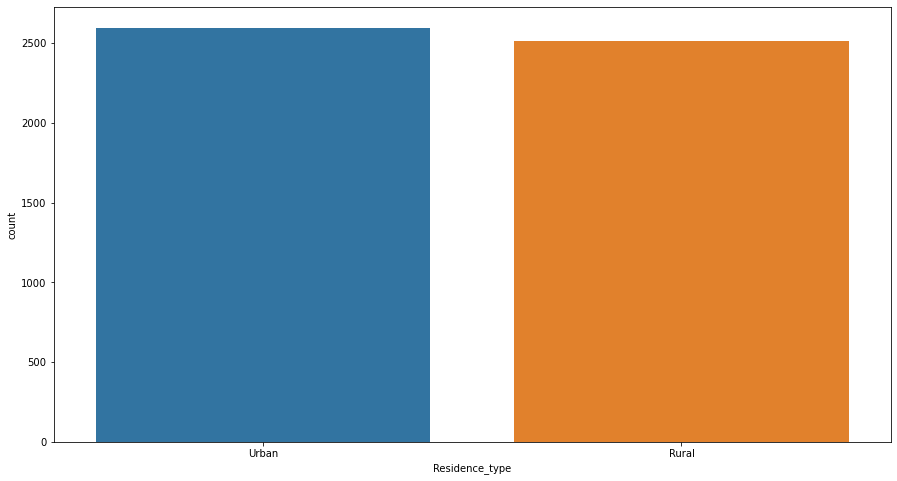

In [30]:
## visualizing Residence Type 
## checking the value_counts for Residence Type
## using sns countplot

print(dataset.Residence_type.value_counts())
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


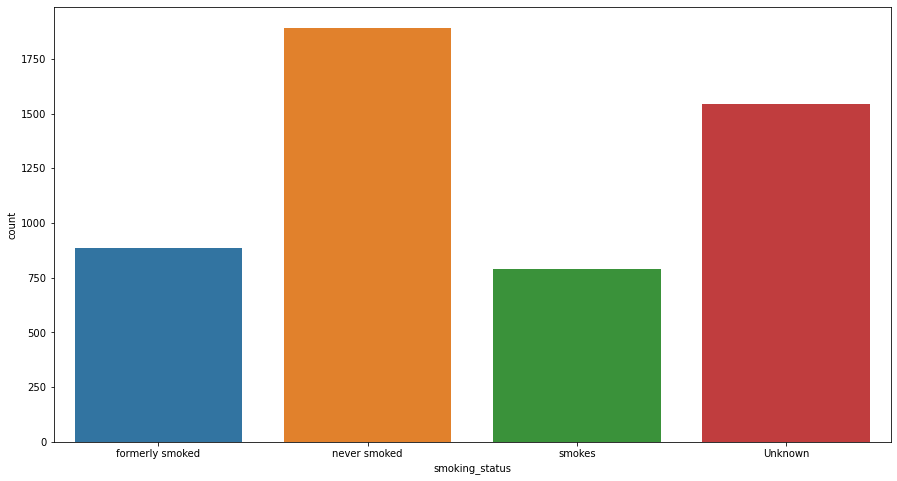

In [31]:
## visualizing Smoking Status
## checking the value_counts for Smoking Status
## using sns countplot

print(dataset.smoking_status.value_counts())
ax = sns.countplot(data=dataset, x="smoking_status")
plt.show()

**A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.**

0    4860
1     249
Name: stroke, dtype: int64


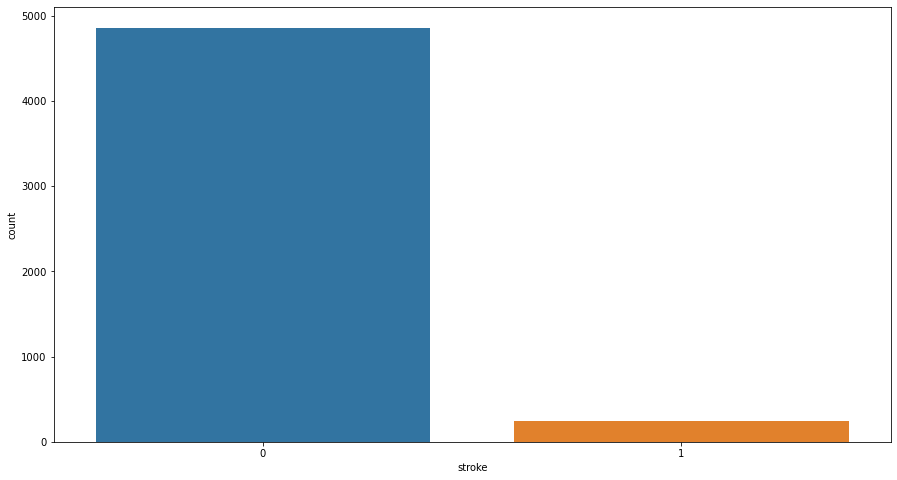

In [32]:
## visualizing Stroke
## checking the value_counts for Stroke
## using sns countplot

print(dataset.stroke.value_counts())
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

**From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.**

**But, first let's plot more to see how our data does in this state.**

### Distribution Plot

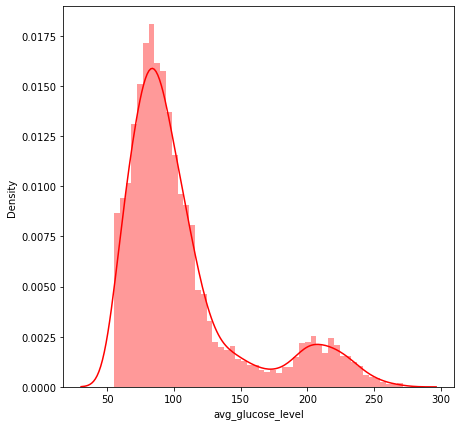

In [33]:
## visualizing Avg. Glucose Level
## using sns boxplot
##kernel density estimation kde
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="red", label="avg_glucose_level",kde=True)
plt.show()


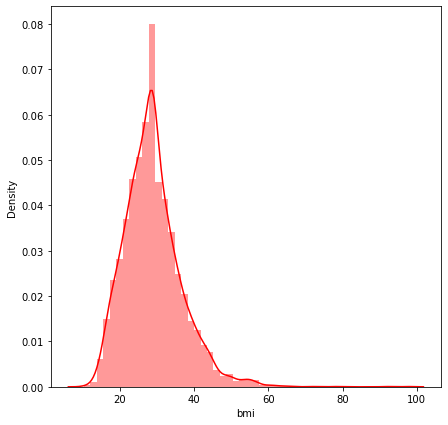

In [34]:
## visualizing BMI
## using sns boxplot
##kernel density estimation kde

fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="red", label="bmi",kde=True)
plt.show()



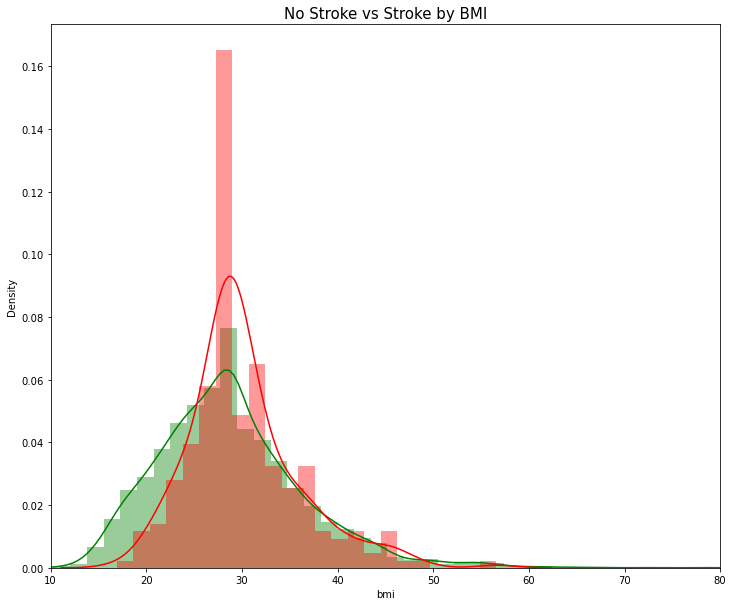

In [35]:
## visualizing No Stroke vs Stroke by BMI
## using sns displot
## .xlim set the range of x-axis
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,80])

plt.show()

**From graph above, it shows that the density of overweight people who suffered a stroke is more.**

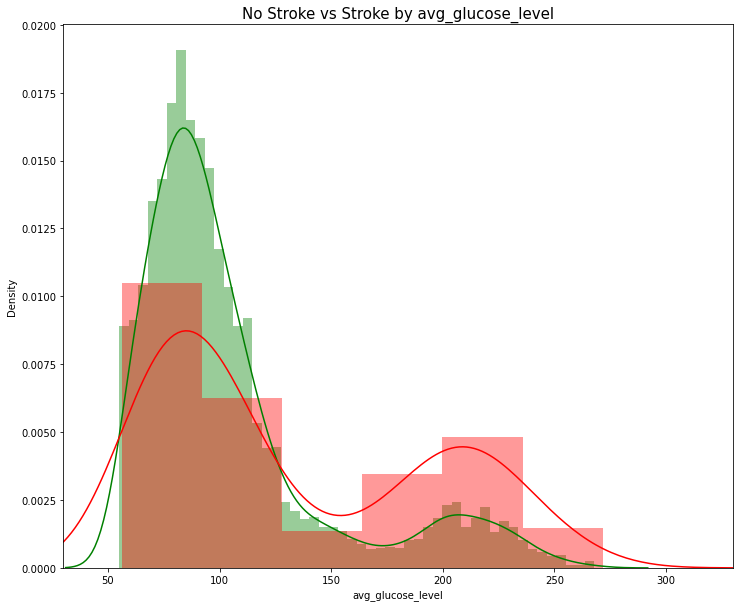

In [36]:
## visualizing No Stroke vs Stroke by Avg. Glucose Level
## using sns displot
## .xlim set the range of x-axis

plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by avg_glucose_level', fontsize=15)
plt.xlim([30,330])

plt.show()


**From graph above, it shows that the density of people having glucose level less than 100 suffered stroke more.**

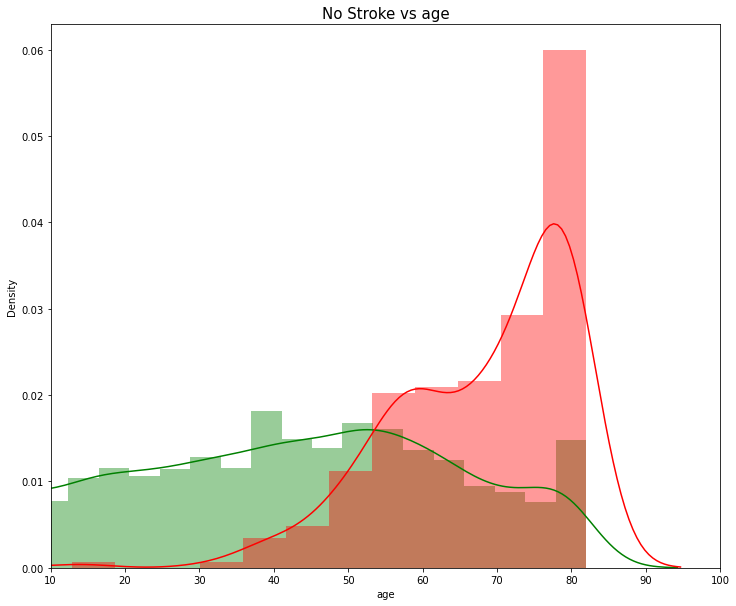

In [37]:
## visualizing No Stroke vs Stroke by Age
## using sns displot
## .xlim set the range of x-axis


plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs age', fontsize=15)
plt.xlim([10,100])

plt.show()

**From above, it can be seen that the density of people having age above suffered stroke more.**

### Scatter Plot

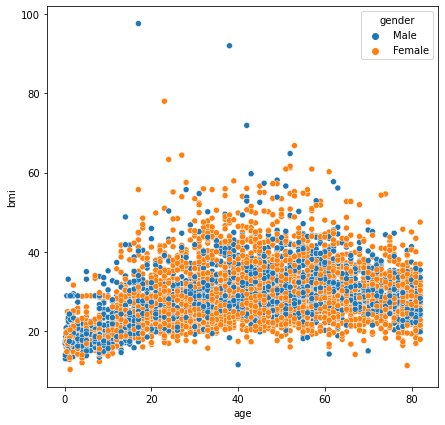

In [38]:
## visualizing Age vs BMI 
## using sns scatter plot

fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
plt.show()

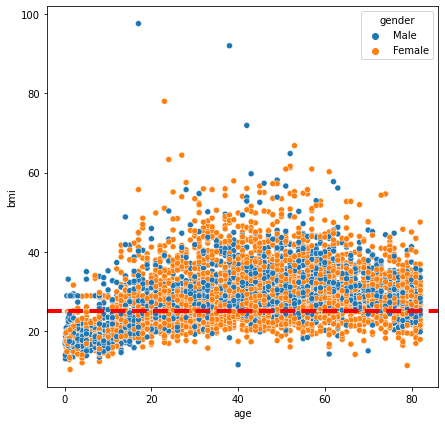

In [39]:
## plotting a line on y-axis @ 25 because above 25 consider as overwieght 
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')

graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')


plt.show()

**From above plot, we can see that there are lot of people having BMI above 25 are overweight.**

**BMI RANGE.**
below 18.5 you're in the underweight range. between 18.5 and 24.9 you're in the healthy weight range. between 25 and 29.9 you're in the overweight range. between 30 and 39.9 you're in the obese range.

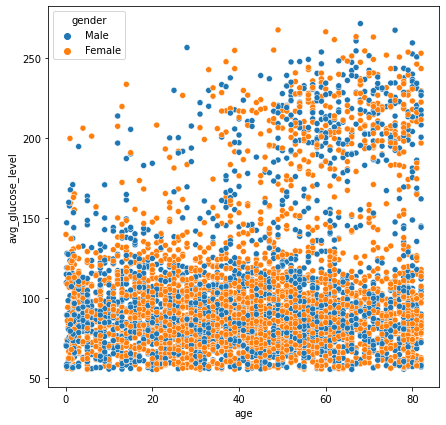

In [40]:
## visualizing Age vs Avg. Glucose Level 
## using sns scatter plot

fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
plt.show()

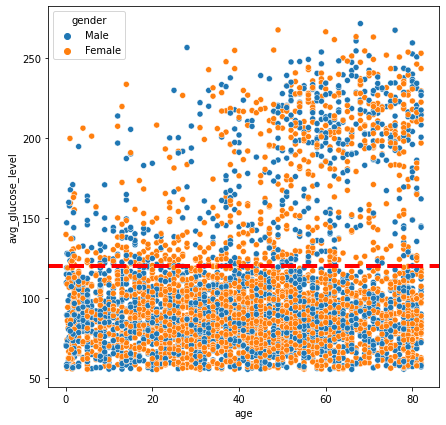

In [41]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 120, linewidth=4, color='r', linestyle= '--')
plt.show()

**From above plot, we can see that people having glucose level above 120 are relatively less as compare one below. So, we can say that people above 120 might be suffering from diabetes.**

### Pair Plot

<Figure size 720x720 with 0 Axes>

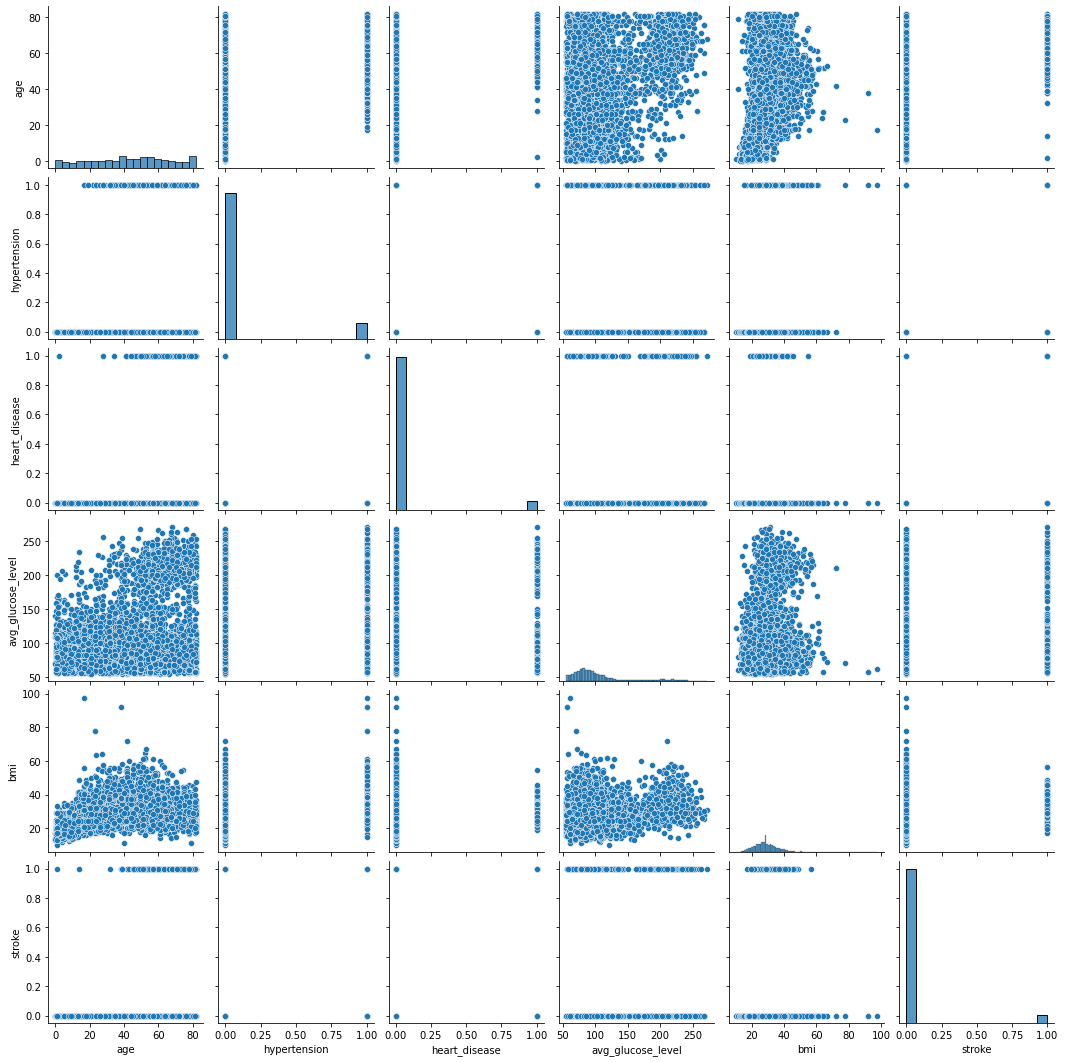

In [42]:
#visualizaing the relationship between different variables.
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# Data Preprocessing

In [43]:
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


**Handling Categorical Values**


In [44]:
print("Unique Values for Gender", dataset['gender'].unique())
print("Unique Values for ever_married", dataset['ever_married'].unique())
print("Unique Values for work_type", dataset['work_type'].unique())
print("Unique Values for Residence_type", dataset['Residence_type'].unique())
print("Unique Values for smoking_status", dataset['smoking_status'].unique())

Unique Values for Gender ['Male' 'Female']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


**Label Encoding**

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [45]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)
print(ever_married_mapping)

{'No': 0, 'Yes': 1}


In [46]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)
print(Residence_type_mapping)

{'Rural': 0, 'Urban': 1}


**One-Hot Encoding**

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical data to the binary values. This operation increases the accuracy.

In [47]:
onehotencoder = OneHotEncoder()

In [48]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5105,1,0
5106,1,0
5107,1,0
5108,0,1


In [49]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [50]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [51]:
#Dropping the values of gender, work type and smoking status 

dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [52]:
#With the help of concat we will join your dummuies variables to your orignal dataset

dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.00,0,1,1,1,228.69,36.60,1,0,1,0,0,1,0,0,0,1,0,0
1,61.00,0,0,1,0,202.21,28.89,1,1,0,0,0,0,1,0,0,0,1,0
2,80.00,0,1,1,0,105.92,32.50,1,0,1,0,0,1,0,0,0,0,1,0
3,49.00,0,0,1,1,171.23,34.40,1,1,0,0,0,1,0,0,0,0,0,1
4,79.00,1,0,1,0,174.12,24.00,1,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.00,1,0,1,1,83.75,28.89,0,1,0,0,0,1,0,0,0,0,1,0
5106,81.00,0,0,1,1,125.20,40.00,0,1,0,0,0,0,1,0,0,0,1,0
5107,35.00,0,0,1,0,82.99,30.60,0,1,0,0,0,0,1,0,0,0,1,0
5108,51.00,0,0,1,0,166.29,25.60,0,0,1,0,0,1,0,0,0,1,0,0


**Now, we don't have categorical variables. Dataset is ready for Machine Learning algorithms.**

## Splitting the dataset into the Training set and Test set 

In [53]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)


In [55]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4087, 18)
Number transactions y_train dataset:  (4087, 1)
Number transactions X_test dataset:  (1022, 18)
Number transactions y_test dataset:  (1022, 1)


## Feature Scaling

**StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.**

In [56]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Scores of Models

**These are the Machine Learning  algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.**

In [57]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachine': SVC(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
}



modelNames = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
              'SupportVectorMachine','KNeighborsClassifier','GaussianNB','BernoulliNB']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
 
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  
  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

LogisticRegression
Train score of trained model: 95.44898458527037
Test score of trained model: 93.9334637964775
 
Confussion Matrix: 
[[960  62]
 [  0   0]]

Accuracy : 0.9393346379647749
Precision: 0.0
Recall   : nan
F1 score : nan
Specificity : 0.9393346379647749

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       1.00      0.94      0.97      1022



############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Test score of trained model: 89.43248532289628
 
Confussion Matrix: 
[[904  52]
 [ 56  10]]

Accuracy : 0.8943248532289628
Precision: 0.16129032258064516
Recall   : 0.15151515151515152
F1 score : 0.15625
Specificity : 0.9456066945606695

Cl

In [59]:
modelNames =['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
              'SupportVectorMachine','KNeighborsClassifier','GaussianNB','BernoulliNB']



In [60]:
for i in range(8):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of LogisticRegression -----> 93.9334637964775
Accuracy of DecisionTreeClassifier -----> 89.43248532289628
Accuracy of RandomForestClassifier -----> 93.83561643835617
Accuracy of GradientBoostingClassifier -----> 93.73776908023484
Accuracy of SupportVectorMachine -----> 93.83561643835617
Accuracy of KNeighborsClassifier -----> 93.9334637964775
Accuracy of GaussianNB -----> 30.430528375733857
Accuracy of BernoulliNB -----> 92.3679060665362


**Evaluation of Models**

I evaluated these models according to their accuracies. Best algorithm is KNN with 93.93%. So, I will make k-Fold Cross Validation and GridSearchCV for KNN algorithm.

**Create a generalized function to calculate the performance metrics for the test set.**

In [61]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

**Define a function to plot the confusion matrix.**

In [62]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],\
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

## K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

**Build a knn model on a training dataset using euclidean distance.**

In [63]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

**Build a confusion matrix.**

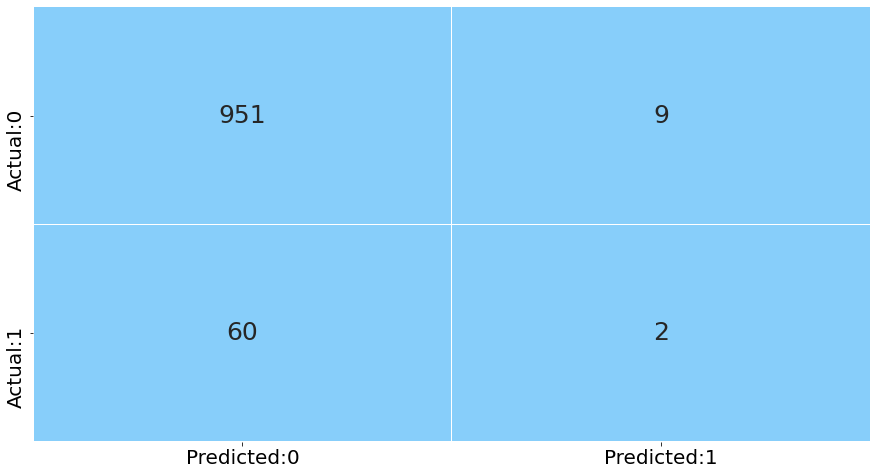

In [64]:
# call the function to plot the confusion matrix
# pass the knn model to the function

from matplotlib.colors import ListedColormap
plot_confusion_matrix(knn_model)

In [65]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.18      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.56      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022



**Interpretation:** The accuracy is 93% for this model.

## Optimal Value of K (using GridSearchCV)

In [66]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 11} 



**Draw a line plot to see the error rate for each value of K using manhattan distance as a metric of KNN model**

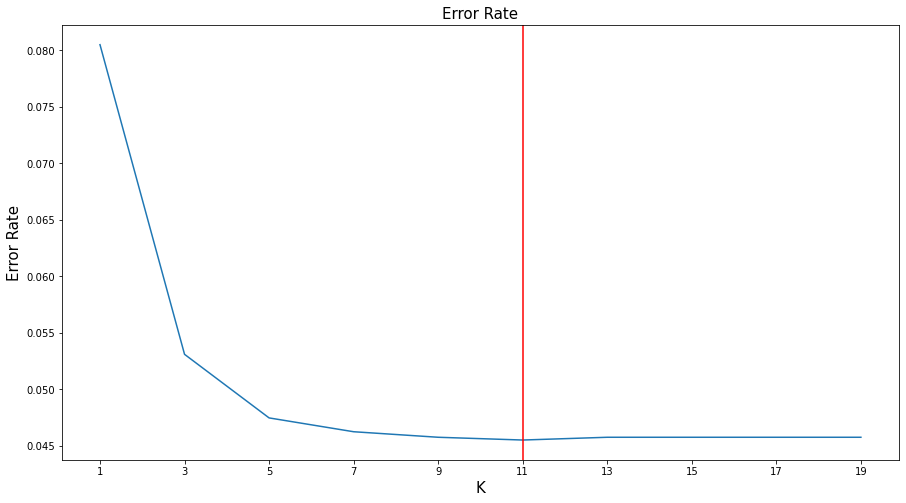

In [67]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,20,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,20,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 20, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 11, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 11) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [68]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



**Interpretation:** The accuracy is 94% for this model.

**Conclusion:**


**Without using Smote Technique.**

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that k - nearest Neighbor(KNN) is best model for this dataset.

# Handling Imbalance data using SMOTE 

**SMOTE-** Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [69]:
dataset.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
samp = SMOTE()

X = dataset.drop(columns='stroke')
y = dataset[['stroke']]


X , y = samp.fit_resample(X,y)

y.value_counts()

stroke
0         4860
1         4860
dtype: int64

In [72]:
X

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_encoded_Female,gender_encoded_Male,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.00,0,1,1,1,228.69,36.60,0,1,0,0,1,0,0,0,1,0,0
1,61.00,0,0,1,0,202.21,28.89,1,0,0,0,0,1,0,0,0,1,0
2,80.00,0,1,1,0,105.92,32.50,0,1,0,0,1,0,0,0,0,1,0
3,49.00,0,0,1,1,171.23,34.40,1,0,0,0,1,0,0,0,0,0,1
4,79.00,1,0,1,0,174.12,24.00,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,76.07,0,0,1,1,139.87,29.69,0,1,0,0,0,0,0,0,1,0,0
9716,76.69,0,0,0,0,90.14,29.58,1,0,0,0,0,0,0,0,0,0,0
9717,45.46,0,0,1,0,101.89,30.45,1,0,0,0,1,0,0,0,0,0,0
9718,67.42,0,0,1,0,100.61,28.42,1,0,0,0,0,0,0,0,0,0,0


In [73]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
9715,1
9716,1
9717,1
9718,1


In [74]:
y.value_counts()

stroke
0         4860
1         4860
dtype: int64

In [75]:
## joining back the target&features into new df

df = pd.concat([X,y],axis=1)
df.head(5)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_encoded_Female,gender_encoded_Male,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,stroke
0,67.00,0,1,1,1,228.69,36.60,0,1,0,0,1,0,0,0,1,0,0,1
1,61.00,0,0,1,0,202.21,28.89,1,0,0,0,0,1,0,0,0,1,0,1
2,80.00,0,1,1,0,105.92,32.50,0,1,0,0,1,0,0,0,0,1,0,1
3,49.00,0,0,1,1,171.23,34.40,1,0,0,0,1,0,0,0,0,0,1,1
4,79.00,1,0,1,0,174.12,24.00,1,0,0,0,0,1,0,0,0,1,0,1


In [76]:
df.shape

(9720, 19)

In [77]:
X = df.drop(columns='stroke')
y = df.stroke

In [78]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_encoded_Female,gender_encoded_Male,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.00,0,1,1,1,228.69,36.60,0,1,0,0,1,0,0,0,1,0,0
1,61.00,0,0,1,0,202.21,28.89,1,0,0,0,0,1,0,0,0,1,0
2,80.00,0,1,1,0,105.92,32.50,0,1,0,0,1,0,0,0,0,1,0
3,49.00,0,0,1,1,171.23,34.40,1,0,0,0,1,0,0,0,0,0,1
4,79.00,1,0,1,0,174.12,24.00,1,0,0,0,0,1,0,0,0,1,0


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7776, 18)
Number transactions y_train dataset:  (7776,)
Number transactions X_test dataset:  (1944, 18)
Number transactions y_test dataset:  (1944,)


In [80]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachine': SVC(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
}



modelNames = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
              'SupportVectorMachine','KNeighborsClassifier','GaussianNB','BernoulliNB']

trainScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
 
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  
  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

LogisticRegression
Train score of trained model: 93.84002057613169
Test score of trained model: 93.62139917695474
 
Confussion Matrix: 
[[966  93]
 [ 31 854]]

Accuracy : 0.9362139917695473
Precision: 0.9017951425554382
Recall   : 0.9649717514124294
F1 score : 0.9323144104803494
Specificity : 0.9121813031161473

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1059
           1       0.90      0.96      0.93       885

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Test score of trained model: 94.29012345679013
 
Confussion Matrix: 
[[937  51]
 [ 60 896]]

Accuracy : 0.9429012345679012
Precision: 0.9461457233368532
Recall   : 0.9372384937238494
F1 score : 

In [81]:
modelNames =['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
              'SupportVectorMachine','KNeighborsClassifier','GaussianNB','BernoulliNB']




In [82]:
for i in range(8):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of LogisticRegression -----> 93.62139917695474
Accuracy of DecisionTreeClassifier -----> 94.29012345679013
Accuracy of RandomForestClassifier -----> 96.65637860082305
Accuracy of GradientBoostingClassifier -----> 95.21604938271605
Accuracy of SupportVectorMachine -----> 90.02057613168725
Accuracy of KNeighborsClassifier -----> 77.9835390946502
Accuracy of GaussianNB -----> 76.59465020576131
Accuracy of BernoulliNB -----> 84.87654320987654


## Tuning the Models

**The GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.**

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [85]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 93.75%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 97.12%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None):
Best Accuracy : 96.77%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.1}

-----------

**Looking at output after GridSearch, we can determine that the RandomForest seems best fit for the model.**

In [86]:
#Function to Tabulate the result
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# create a list of column names
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                    'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [87]:
#Random forest Classifier
rf_class  = RandomForestClassifier()
rf_class.fit(X_train,y_train)




RandomForestClassifier()

In [88]:
y_pred = rf_class.predict(X_test)

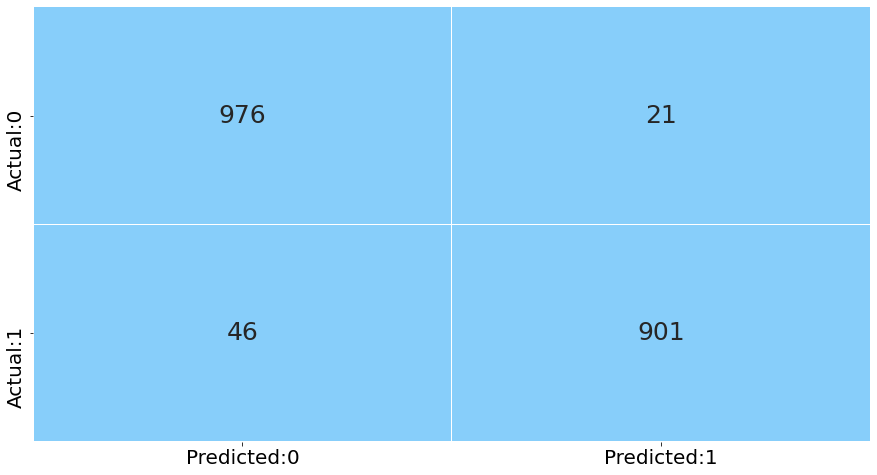

In [89]:
plot_confusion_matrix(rf_class)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       997
           1       0.98      0.95      0.96       947

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944



In [91]:
update_score_card('Random Forest classifier')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Random Forest classifier,0.98,0.95,0.97,0.96


**Use GridSearch to obtain the optimal values of hyperparameters**

In [92]:
tuned_paramaters = [{'n_estimators': [ 100,150,200],
                     'criterion':['gini','entropy'],
                     'random_state':[0],}]



In [93]:
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_class_CV= RandomForestClassifier(random_state = 0)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_class_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0} 



In [94]:
# predict the class labels using 'X_test'
y_pred = dt_grid.predict(X_test)

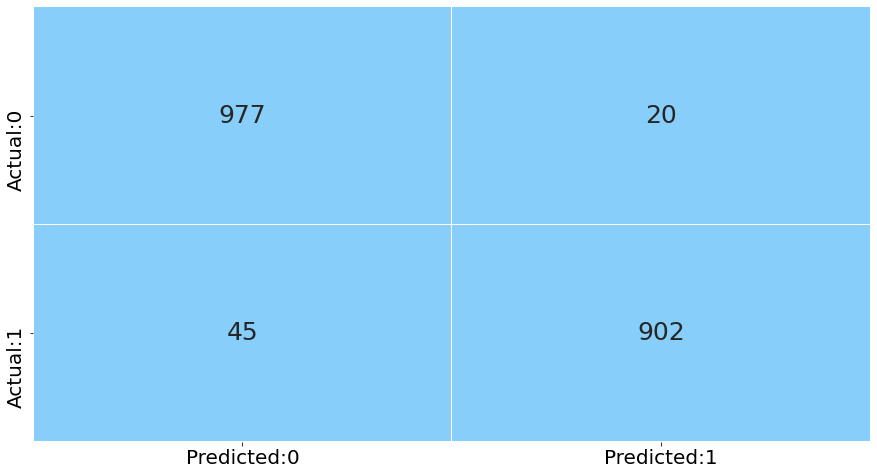

In [95]:
plot_confusion_matrix(dt_grid)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       997
           1       0.98      0.95      0.97       947

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944



**Interpretation:** The accuracy is 97% for this model.

**Conclusion:**


**With using Smote Technique.**

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models.It have best Accuracy apart from all the models that i  have run above.Without smote knn giving us best accuracy and with smote RandomForestClassifier giving us best accuracy to your dataset. After that, I came to conclusion that RandomForestClassifier is best model for this dataset.

**The End**